## Assignment 4 ##

Using data from this FiveThirtyEight post, write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

http://fivethirtyeight.com/datalab/opinions-about-the-iran-deal-are-more-about-obama-than-iran/

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
import statsmodels.formula.api as smf # package we'll be using for linear regression
import matplotlib
import pandas as pd
import numpy as np
plt.style.use('ggplot')
import dateutil.parser
import math
import random
import matplotlib.ticker as plticker


matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_excel("iran_obama.xlsx")
df.head()

,Iran_Deal,Approval_for_Obama
Democrats,60,78
Republicans,34,10
Black,54,85
White,45,35
Ind,44,37


In [10]:
lm = smf.ols(formula="Iran_Deal~Approval_for_Obama",data=df).fit() #notice the formula regresses Y on X (Y~X)
lm.params

Intercept             30.730004
Approval_for_Obama     0.354593
dtype: float64

In [11]:
intercept, slope = lm.params

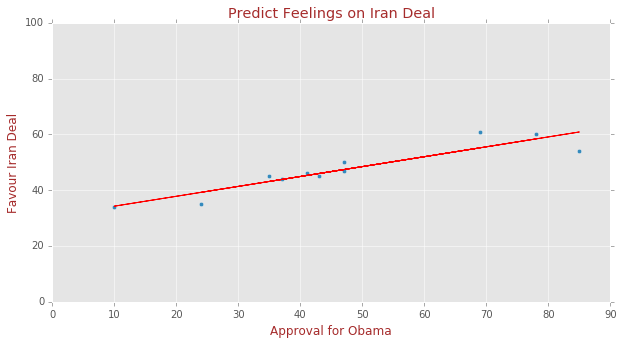

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind="scatter",x="Approval_for_Obama",y="Iran_Deal", ax=ax)
plt.plot(df["Approval_for_Obama"],slope*df["Approval_for_Obama"]+intercept,"-",color="red")
ax.set_ylim([0, 100])
ax.set_title("Predict Feelings on Iran Deal", color='brown')
ax.set_xlabel('Approval for Obama', color='brown')
ax.set_ylabel('Favour Iran Deal', color='brown')

In [6]:
lm.summary()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Approval_for_Obama   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     50.70
Date:                Tue, 26 Jul 2016   Prob (F-statistic):           5.54e-05
Time:                        23:53:00   Log-Likelihood:                -38.948
No. Observations:                  11   AIC:                             81.90
Df Residuals:                       9   BIC:                             82.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.5279     16.172     -4.114      0.003    -103.111     -29.945
Iran_Deal      2.3950      0.336      7.121      0.000       1.634       3.156
==============================================================================
Omnibus:                       11.277   Durbin-Watson:                   2.838
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.627
Skew:                           1.476   Prob(JB):                       0.0600
Kurtosis:                       4.889   Cond. No.                         280.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
neg_df = pd.read_excel("negiran_obama.xlsx")
neg_df.head()

,Iran_neg,Approval_for_Obama
Democrats,29,78
Republicans,4,10
Black,37,85
White,11,35
Ind,15,37


In [13]:
neg_lm = smf.ols(formula="Iran_neg~Approval_for_Obama",data=neg_df).fit() #notice the formula regresses Y on X (Y~X)
neg_lm.params

Intercept            -0.762126
Approval_for_Obama    0.399968
dtype: float64

In [14]:
intercept, slope = neg_lm.params

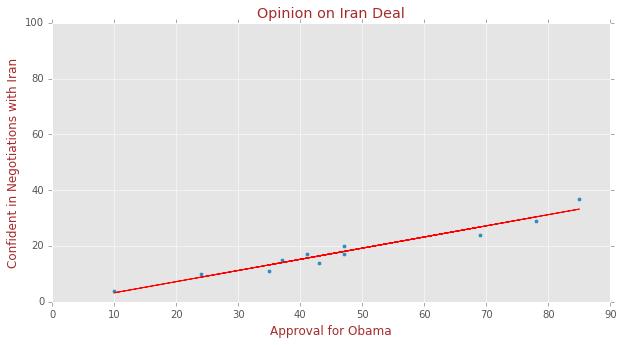

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
neg_df.plot(kind="scatter",x="Approval_for_Obama",y="Iran_neg", ax=ax)
plt.plot(df["Approval_for_Obama"],slope*df["Approval_for_Obama"]+intercept,"-",color="red")
ax.set_ylim([0, 100])
ax.set_title("Opinion on Iran Deal", color='brown')
ax.set_xlabel('Approval for Obama', color='brown')
ax.set_ylabel('Confident in Negotiations with Iran', color='brown')

In [16]:
neg_lm.summary()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Iran_neg   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     163.1
Date:                Thu, 28 Jul 2016   Prob (F-statistic):           4.52e-07
Time:                        11:18:50   Log-Likelihood:                -23.340
No. Observations:                  11   AIC:                             50.68
Df Residuals:                       9   BIC:                             51.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7621      1.616     -0.472      0.648      -4.418       2.893
Approval_for_Obama     0.4000      0.031     12.772      0.000       0.329       0.471
==============================================================================
Omnibus:                        0.645   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.571
Skew:                           0.153   Prob(JB):                        0.752
Kurtosis:                       1.927   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""